# Assignment 3

* <b>Do not change the structure</b> of the notebook, only fill in the parts where your code needs to be filled in.

---

* Read carefully if the assignment asks for a Pandas **dataframe** or a Pandas **series**.

--- 

* For your notebook, <b>use as filename</b> `assignment03_vunetID.ipynb`, where `vunetID` is your three letter, three digit VU ID.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

### Datetime manipulations

The Data Wrangling course started on Tuesday 10 January 2023 at 1.30 pm and will end on Friday 3 February 2023 at 5.00 pm. Calculate the duration of the course in minutes. Assign the value to the variable *duration*.


In [2]:
from datetime import datetime

# YOUR CODE HERE
start = datetime(2023,1,10,13,30)
end = datetime(2023,2,3,17,0)

duration = end - start
duration = (duration.seconds)*60

# YOUR CODE ENDS HERE

In [3]:
print(duration)

756000


Below you will find the scheduled days of the course Data Wrangling. The values in the time series denote the number of contact hours spend on each lecture. Create a time series that calculates the cumulative sum of all the hours that you have spent on the course. Assign the cumulative sum up to 31 January 2023 to the variable *cum_hours*.

In [4]:
from datetime import datetime
from pandas.tseries.offsets import *


dates = [datetime(2023, 1, 10), datetime(2023, 1, 11), datetime(2023, 1, 13),
         datetime(2023, 1, 17), datetime(2023, 1, 18), datetime(2023, 1, 20),
         datetime(2023, 1, 24), datetime(2023, 1, 25), datetime(2023, 1, 27),
         datetime(2023, 1, 31), datetime(2023, 2,  1), datetime(2023, 2,  2),
         datetime(2023, 2,  3)]
ts = pd.Series([2, 2, 1, 2, 2, 1, 2, 2, 1, 3, 3, 3, 3], index = dates)

# YOUR CODE HERE

cum_hours = ts[:"2023-1-31"].sum()

# YOUR CODE ENDS HERE

In [5]:
print(cum_hours)

18


Suppose that you want to become a world-class expert in data wrangling. So, you decide to spent 2 hours learning data wrangling every Tuesday in 2023. As you have a lot of free time every first Wednesday of the month, you spent 3 hours learning data wrangling those days in 2023. Calculate how many hours you will spend learning in 2023. Assign that value to the variable *study_hours*.

In [6]:
from datetime import datetime

# YOUR CODE HERE
tuesday = pd.date_range(start = "2023", end = "2024", freq = "W-TUE")
tuesdayData = pd.Series(np.full((len(tuesday)),2),index = tuesday)

wednesday = pd.date_range(start = "2023", end = "2024", freq = "WOM-1WED")
wednesdayData = pd.Series(np.full((len(wednesday)),3),index = wednesday)

study_hours = tuesdayData.sum() + wednesdayData.sum()
# YOUR CODE ENDS HERE

In [7]:
print(study_hours)

140


Generate all business days in 2023 that start at the first weekday of the month. Calculate how many of these days fall on the second day of the month. Assign that value to the variable *second_days*.

In [8]:
from datetime import datetime

# YOUR CODE HERE
allDays = pd.date_range(start = "2023", end = "2024", freq = "B")

second_days = 0

for individualDay in allDays:
    if(individualDay.day == 2):
        second_days += 1
        
# YOUR CODE ENDS HERE

In [9]:
print(second_days)

8


The first blood moon in 2023 will fall on 5 May 2023 at 21.17 pm in Amsterdam. Calculate what time it will be in Sydney (Australia) at that exact moment. Assign the answer to *bloodmoon*.

In [10]:
from datetime import datetime
import pytz

# YOUR CODE HERE
bloodmoon_Amsterdam = pd.Timestamp(datetime(2023,5,5,21,17)).tz_localize("Europe/Amsterdam")
bloodmoon = bloodmoon_Amsterdam.tz_convert("Australia/Sydney")

# YOUR CODE ENDS HERE

In [11]:
print(bloodmoon)

2023-05-06 05:17:00+10:00


### Sales volumes

The file *volume.csv* contains sales volumes of different companies. Read the file, and calculate the mean sales volumes of each company in the year 2010. Assign the series to the variable *volumes2010*. 

In [12]:
file = 'volume.csv'

# YOUR CODE HERE
newFile =  pd.read_csv(file,index_col= 0,parse_dates= True)
volumes2010 = newFile.loc["2010"].mean()

# YOUR CODE ENDS HERE


In [13]:
print(volumes2010)

AA      3.113912e+07
AAPL    2.140376e+07
GE      7.223856e+07
IBM     6.422816e+06
JNJ     1.214678e+07
MSFT    6.306716e+07
PEP     6.962504e+06
SPX     4.566245e+09
XOM     2.643224e+07
dtype: float64


On which day did the sales volume of Apple (*AAPL*) overtake the sales volume of Microsoft (*MSFT*) for the first time? Calculate the value and assign the timestamp to the variable *changeover*.

In [14]:
file = 'volume.csv'

# YOUR CODE HERE
newFile =  pd.read_csv(file,index_col= 0,parse_dates= True)
data = newFile.loc[:,["AAPL","MSFT"]]

for key in data.index:
    if(data.loc[key].AAPL > data.loc[key].MSFT):
        changeover = key
        break

# YOUR CODE ENDS HERE

In [15]:
print(changeover)

1992-08-06 00:00:00


Format the date that you have found in a nicer way corresponding to the style dd/mm/yy. Thus, the day (dd), month (mm), and the year (yy) are formatted in 2 digits, separated by slashes. Assign the string to the variable *nicedate*.

In [16]:
# YOUR CODE HERE
nicedate = changeover.strftime("%d/%m/%Y")
# YOUR CODE ENDS HERE

In [17]:
print(nicedate)

06/08/1992


Apple has to report every end of the year (31 December) what its current sales volume is (not cumulative!). Create a time series for every year with the sales volume listed for Apple (AAPL) on 31 December. If the data does not contain a record for this date, then take the last known value that this known prior to that date. Assign the time series to the variable *apple_report*.

In [18]:
# YOUR CODE HERE
apple_report = newFile.AAPL.resample("Y").last()
# YOUR CODE ENDS HERE

In [19]:
print(apple_report)

1990-12-31     1593200.0
1991-12-31     4802000.0
1992-12-31     3302000.0
1993-12-31     5765200.0
1994-12-31     2616400.0
                 ...    
2007-12-31    19261900.0
2008-12-31    21697900.0
2009-12-31    12586100.0
2010-12-31     6911000.0
2011-12-31    20450000.0
Freq: A-DEC, Name: AAPL, Length: 22, dtype: float64


The volumes of Apple are highly fluctuating over time. You can clearly see that when you make a plot. It would be better to smooth out the sales volume by taking a moving average with a period of 200 days. Calculate the moving average of the sales volume and assign the series to the variable *apple_smooth*. Create a plot with the original time series and the smooth version of the time series.

<AxesSubplot:>

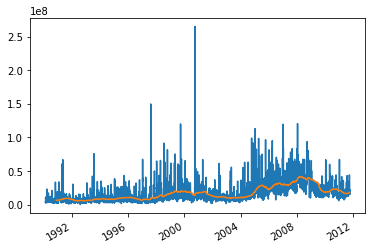

In [20]:
# YOUR CODE HERE
appleData = newFile.loc[:,"AAPL"]
apple_smooth = appleData.rolling(200).mean()
appleData.plot()
apple_smooth.plot()
# YOUR CODE ENDS HERE

In [21]:
print(apple_smooth)

1990-02-01           NaN
1990-02-02           NaN
1990-02-05           NaN
1990-02-06           NaN
1990-02-07           NaN
                 ...    
2011-10-10    18033579.0
2011-10-11    18097018.0
2011-10-12    18176636.0
2011-10-13    18223393.5
2011-10-14    18297519.5
Name: AAPL, Length: 5472, dtype: float64
